# **Part 1 : Simulation of random variables**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.stats as sts

The base function to generate random numbers with python is `rnd.random()` that gives back a uniform random number between $0$ and $1$.

Execute multiple times the two following cells : 

In [2]:
rnd.random()

0.4408976790073871

In [3]:
rnd.seed(1)
rnd.random()

0.13436424411240122

With `rnd.seed(a)` you fixe the seed used to generate these numbers and therefore the your "random" experiences become reproductible.

 In reality the "random" numbers you can access are what we call "pseudo-random" numbers, they follow a sequence that give an illusion of randomness when repeted.

#### Generate integers

In [4]:
rnd.randint(1,20) # generate integers n between 1 and 20,  (a<= n <= b)

3

In [5]:
rnd.randrange(1, 21, 2) # générate numbers between 1 and 21, (1 included, 21 excluded) with steps of 2
                        # so here it return 3, 5, 7, 9, 11, 13, 15, 17 or 19.
                        # if the stap is not mentioned, the default value is 1

9

### with sequences

In [6]:
rnd.choice([1, 4, 5.6, 'rty', True])  #select a random element in the sequence

1

In [7]:
rnd.choices([1, 4, 5.6, 'rty', True],           # give back a list of  lenght k of elements of the sequence 
            weights = [.1, .6, .1, .1, .1],     # each one independantly selected according to the weights
            k=3)

[4, 4, 4]

In [8]:
rnd.sample(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], 5)
# select 5 element of the list WITHOUT repetition

['sunday', 'tuesday', 'monday', 'thursday', 'friday']

`rnd.sample(['red', 'green', 'blue'], k=5, counts = [1, 4, 2])` 
 works only with python version 3.9 and more, 
 it is equivalente to : 

In [10]:
rnd.sample(['red', 'green', 'green', 'green', 'green', 'blue', 'blue'], k=5)

['blue', 'green', 'blue', 'red', 'green']

In [13]:
l = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
rnd.shuffle(l) # in place suffle, the same variable will contain your list/array with a random permutation

l

['friday', 'wednesday', 'sunday', 'tuesday', 'monday', 'saturday', 'thursday']

### Real distributions

Some distributions are already implemented in `ramdom`, those method only implement one realisation of a variable. To go deeper, we'll use the `scipy.stats` module. You'll have much more distributions and also more tools than only generation. See [here](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) for the whole list

In [16]:
Z = sts.norm(loc=1, scale = 2) # without loc and scale it's a standard gaussian (mean 0, std 1)

Now with differents method we can access different informations about this variable : 
- `Z.rvs()` to generate a random number 
- `Z.pdf(x)` the probability density function 
- `Z.cdf(x)` for the cumulative distribution function
- `Z.ppf(q)` for percent point function (inverse of `cdf`)
- `Z.sf(x)` for the survival function (also define as `1 - cdf`)
- `Z.interval(confidence, p, a, b)` gives a confidence interval with equal areas around the median
- many more

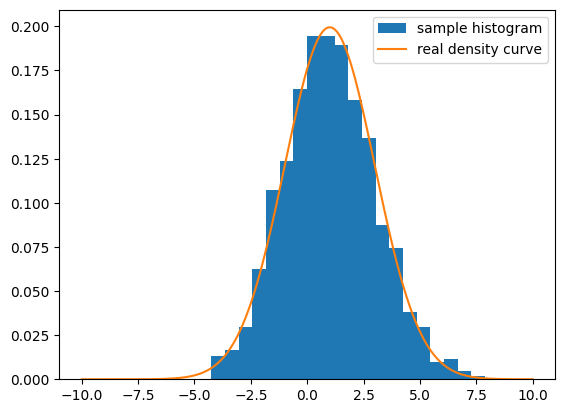

In [27]:
N = 1000

sample = Z.rvs(size = N)
xx = np.linspace(-10, 10, 1000)

plt.hist(sample, density=True, bins = 20, label = 'sample histogram')
plt.plot(xx, Z.pdf(xx), label='real density curve')
plt.legend()

# **Part 2 : Image managing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
img_bw = Image.open('calanque.png').convert('L') #'RGB' for color images, or 'L' for greyscale, and '1' for black or white
img_rgb = Image.open('calanque.png').convert('RGB') 

To work with image we use the module `Image` in the `PIL` library (here's the corresponding [documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html) ), this can allow to import, expor, do some transformations on an existing image. But you can also create new ones with NumPy `2d-array` with each element of the array represent a pixel, with one value for greyscale images, or thre for RGB ones, then you can visualize them with `matplotlib`. 

You can also switch from from PIL.Image to np.array, with
`np.array( ... )` 

In [ ]:
type(img_bw)

In [ ]:
img_bw #here it just print you as an output the image

In [ ]:
img_bw.show() #if you're not in google colab : show the image and open it in another window 


In [ ]:
display(img_bw) #the same thing with google colab

The interest of `.show()` or `display()` is that it will always displayyour image even in the middle of your code. If you have an image store in the varible `img`, just calling `img` it won't display it, this only work when you call `img` at he end of a cell, look at the next cell for an exemple

In [ ]:
img_bw
print(12)

To modify or to create an image pixel by pixel, we convert it to a `numpy_array`

In [ ]:
array_bw = np.array(img_bw)
array_rgb = np.array(img_rgb)

In [ ]:
plt.imshow(array_bw, cmap = 'gray')

the `cmap` parameter in the colormap used it will automaticaly scale from the minimum to the maximum valu of your array. If you don't precise it, it will use `'viridis'` wich goes from purple to yellow, for black and White images the more appropriate one is `'gray'`, but there is many of possibilyties depending on wath you're displaying, see [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html/) for more 

In [ ]:
list_of_cmaps = ['viridis', 'gray', 'Greys', 'summer', 'winter', 'cool', 'prism', 'jet', 'bwr', 'nipy_spectral', 'tab10', 'tab20']
N = len(list_of_cmaps)

fig, ax = plt.subplots(figsize=(10,5))

for i, cmap in enumerate(list_of_cmaps) : 
    xx = np.linspace(0, 1, 2000)
    yy = [ i/N for _ in range(2000)]
    plt.scatter(xx, yy, marker = 's', s= 200 ,  c=xx, cmap= cmap, label=f'{cmap}')
    ax.annotate(f'{cmap}', xy = (1.05, i/N))

    

ax.set_xlim(-.05, 1.3)
# plt.legend()

In [ ]:
# execute this cell to see all the possible colormaps
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axs[0].set_title(f"{cmap_category} colormaps", fontsize=14)

    for ax, cmap_name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=cmap_name)
        ax.text(-.01, .5, cmap_name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

`plt.imshow()` also work for RGB images, with an array of shape `(n, m, 3)` it will automatically interprets it as an RGB image

In [ ]:
plt.imshow(array_rgb)


Be careful when manipulating images as numpy array : the first coordinate corresponds to the vertical axis directed from top to bottom, and the second coordinate to the horizontale axis from left to right. The indexes  are like for matrixes but starting from 0.

For exemple here the red squared pixel is the one of index `[6,2]`

![image plt_imshow.png](<attachment:image plt_imshow.png>)
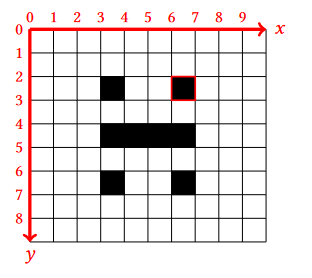

In [ ]:
xx = np.linspace(0, 1200, 1200)
plt.imshow(array_rgb)
plt.plot(xx, xx, color = 'red')

plt.axis('off') #to get rid of the axis display 

In [ ]:
def filter_col(array, k):
    """
    we only look at one color channel (k=0 : red, k=1 : green, k=2 : blue)
    we keep the 3 dimentions for each pixel, 
    we keep the value of our filter as it is and set the others two at 0
    """
    n = len(array)
    m = len(array[0])
    res = array.copy()
    res[:,:, (k+1)%3] = np.zeros((n,m))
    res[:,:, (k+2)%3] = np.zeros((n,m))
    return res

def from_rgb_to_gl(array):
    """
    We calculate the luminance for each pixel : L = 0.2126 * R + 0.7152 * G + 0.0722 * B
    """
    res = 0.2126 * array[:,:,0] + 0.7152 * array[:,:,1] + 0.0722 * array[:,:,2]
    return res


def from_rgb_to_bw (array, t):
    """
    We calculate the mean of the tree values for each pixel and compare it to a threshold value (t)
    if it's above the piwel is white, otherwise it's black
    """
    n = len(array)
    m = len(array[0])
    res = array.mean(axis=2) > t
    return res

In [ ]:
array_rgb.mean(axis=2)

In [ ]:
plt.imshow(filter_col(array_rgb, 0))

In [ ]:
plt.imshow(from_rgb_to_gl(array_rgb), cmap='gray')

In [ ]:
array_rgb.mean()

In [ ]:
list_t = [ 1, 25, 50, 75, 100, 120, 125, 150, 175, 200, 225, 250, 255]

n_col = 4
n_row = (len(list_t)//4) + 1

plt.figure(figsize = ( 8*n_col, 8*n_row))
for i,t in enumerate(list_t):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(from_rgb_to_bw(array_rgb, t), cmap='gray')
    plt.title(f't = {t}')
    plt.axis('off')

## Creating your images from scratch

In [ ]:
n, m = 10, 15
my_img = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        my_img[i,j] = np.random.rand()

plt.imshow(my_img)

In [ ]:
plt.imsave('pic1.png', my_img) # this will save your image as a png file in the same place your notebook is stored
#if a file with this name already exists it will erase it and replace it the image
# to save it in a different folder, just replace the name of the file with the whole path to it

In [ ]:
grid_states = np.array([[3, 1, 0, 0, 0],
                        [0, 1, 0, 1, 0],
                        [0, 2, 2, 1, 1],
                        [0, 1, 1, 1, 0],
                        [0, 0, 0, 0, 0],
                        ])

plt.imshow(grid_states, cmap = 'Set3' )

In [ ]:
import random

In [ ]:
def create_rnd_labyrinth(width, height):
    labyrinth = [[0] * width for _ in range(height)]

    for x in range(1, width - 1, 2):
        for y in range(1, height - 1, 2):
            labyrinth[y][x] = 1  # Passege
            direction = random.choice([(0, 1), (1, 0), (0, -1), (-1, 0)])
            maze_y = y + direction[1]
            maze_x = x + direction[0]
            if 0 < maze_y < height and 0 < maze_x < width:
                labyrinth[maze_y][maze_x] = 1

    return labyrinth


maze = create_rnd_labyrinth(20, 20)

plt.imshow(maze, cmap='Greys')


In [ ]:
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        pu, pv = self.find(u), self.find(v)
        if pu != pv:
            self.parent[pu] = pv
            return True
        return False

def kruskal_labyrinth(width, height):
    labyrinth = [[1] * width for _ in range(height)]
    walls = []
    uf = UnionFind(width * height)

    for y in range(0, height, 2):
        for x in range(0, width, 2):
            labyrinth[y][x] = 0
            if x < width - 2:
                walls.append((x, y, x + 2, y))
            if y < height - 2:
                walls.append((x, y, x, y + 2))

    random.shuffle(walls)

    for x1, y1, x2, y2 in walls:
        if uf.union(y1 * width + x1, y2 * width + x2):
            labyrinth[(y1 + y2) // 2][(x1 + x2) // 2] = 0

    return labyrinth


maze = kruskal_labyrinth(20, 20)
plt.imshow(maze, cmap='Greys')

# **Part 3 : Integrating SQL requests**

Une [video](https://www.youtube.com/watch?v=IqgWWGE2DV0) qui intègre des requete SQL dansun notebook qui tourne sur Python 3

In [ ]:
import pandas as pd
import sqlite3 as sql

Creating a database connection

In [ ]:
# connect() method
db_connection = sql.connect('new_sql_bd')

Create a middleware between SQL database connection and SQL Query

In [ ]:
# cursor()
execute_sql = db_connection.cursor()

Import required tables as dataframes

In [ ]:
# read csv 
# path = # the path to your csv document or its name if it is store in the same folder as your notebook

path = 'store_table_exemple.csv'


new_table = pd.read_csv(path, sep =';')

new_table

Insert the date into the sql database

In [ ]:
# to_sql() method, inside the parentethis will be the name of the sql database
new_table.to_sql('store_table',
                 con = db_connection,
                 if_exists = 'replace')


Query table using SQL

`result = pd.read_sql(""" `\
                    `You write here your SQL request `\
                    `""", `\
                    `con = db_connection)`

In [ ]:
result = pd.read_sql(""" select * from
                    store_table
                     where item in ('pen', 'book')
                    """, 
                    con = db_connection)

In [ ]:
result 

In [ ]:
result2 = pd.read_sql(""" select avg(unit_sold) as avg_units from
                    store_table
                     where item in ('pen', 'book')
                    """, 
                    con = db_connection)

In [ ]:
result2

In [ ]:
df= pd.DataFrame({'name': ['Juan', 'Victoria', 'Mary'], 
                  'age': [23,34,43], 
                  'city': ['Miami', 'Buenos Aires','Santiago']})

df

## Another way to do it

In [ ]:
!pip install ipython-sql # à n'executer qu'une fois

In [ ]:
cnn = sql.connect('jupyter_sql_tutorial.db')

In [ ]:
df.to_sql('people', cnn, if_exists = 'replace')
%load_ext sql

In [ ]:
%sql sqlite:///jupyter_sql_tutorial.db

In [ ]:
%%sql
SELECT *
FROM people


In [ ]:
%%sql
SELECT count(*)
FROM people

In [ ]:
%%sql
SELECT sum(age) as 'age_sum'
FROM people